## Day-04 Decision Tree


In [15]:
# import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# Data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

# Display dataset information
print("Dataset Shape:", X.shape)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of target:")
print(y.head())


Dataset Shape: (17379, 13)

First few rows of features:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  

First few rows of target:
   cnt
0   16
1   40
2   32
3   13
4    1


In [17]:
# Display dataset information
print("Dataset Shape:", X.shape)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of target:")
print(y.head())


Dataset Shape: (17379, 13)

First few rows of features:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  

First few rows of target:
   cnt
0   16
1   40
2   32
3   13
4    1


### Data Preprocessing

In [18]:
# Check for missing values
print("\nMissing values in features:", X.isnull().sum())
print("\nMissing values in target:", y.isnull().sum())


Missing values in features: dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

Missing values in target: cnt    0
dtype: int64


In [19]:
# check info:
print("\nInfo of features:")
print(X.info())
print("\nInfo of target:")
print(y.info())


Info of features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB
None

Info of target:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -

In [20]:
# Check for duplicates
print("\nDuplicate rows in features:", X.duplicated().sum())
print("\nDuplicate rows in target:", y.duplicated().sum())


Duplicate rows in features: 0

Duplicate rows in target: 16510


In [21]:
# Display basic statistics
print("\nBasic statistics of features:")
print(X.describe())
print("\nBasic statistics of target:")
print(y.describe())


Basic statistics of features:
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771 

In [22]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [24]:
# convert date to datetime and extract usefull info
X['dteday'] = pd.to_datetime(X['dteday'])
X['day'] = X['dteday'].dt.day
X['dayofyear'] = X['dteday'].dt.dayofyear

In [25]:
# Drop the original date column as we've extracted useful features
X = X.drop('dteday', axis=1)

In [ ]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,dayofyear
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [27]:
X.tail()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,dayofyear
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,31,366
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,31,366
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,31,366
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,31,366
17378,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,31,366


### (EDA): Data Exploration

AttributeError: module 'matplotlib.pyplot' has no attribute 'rotate_xlabels'

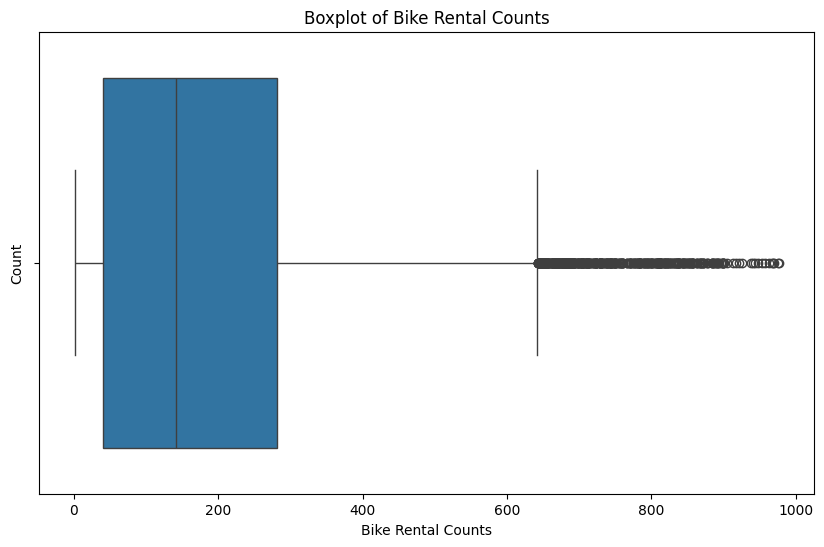

In [ ]:
# check out outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=y, x='cnt')
plt.title('Boxplot of Bike Rental Counts')
plt.xlabel('Bike Rental Counts')
plt.ylabel('Count')
plt.show()


Data shape after preprocessing: (17379, 14)


Text(0.5, 1.0, 'Distribution of Bike Rentals')

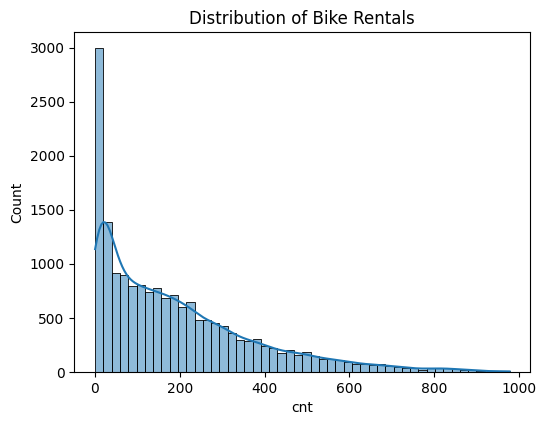

In [42]:
# Handle outliers in target variable
print(f"Data shape after preprocessing: {X.shape}")

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(20, 15))

# Distribution of target variable
plt.subplot(3, 3, 1)
sns.histplot(y['cnt'], bins=50, kde=True)
plt.title('Distribution of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Hour')

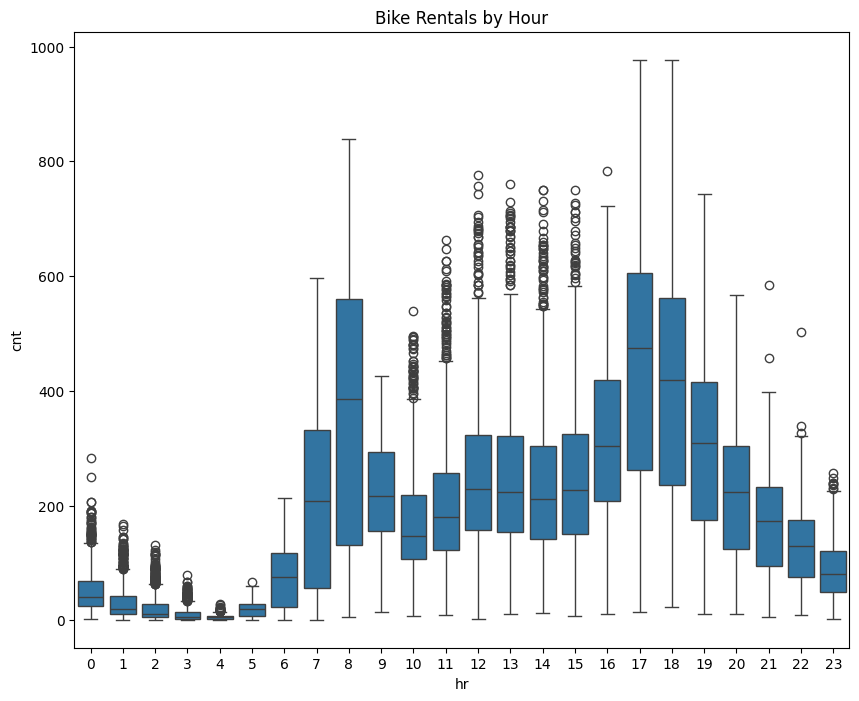

In [45]:
# Bike rentals by hour
plt.figure(figsize=(10,8))
sns.boxplot(data=pd.concat([X, y], axis=1), x='hr', y='cnt')
plt.title('Bike Rentals by Hour')

Text(0.5, 1.0, 'Bike Rentals by Season')

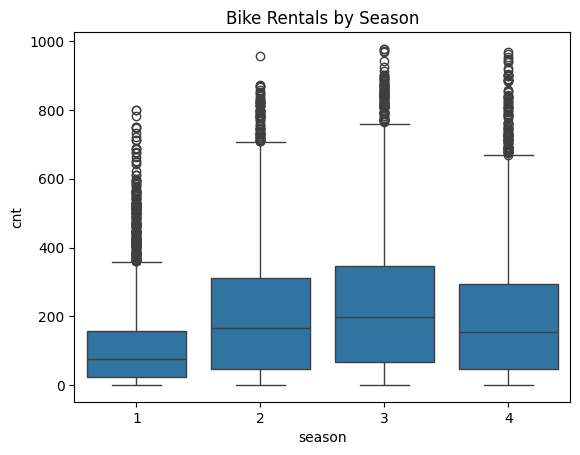

In [ ]:
# Bike rentals by hour
sns.boxplot(data=pd.concat([X, y], axis=1), x='season', y='cnt')
plt.title('Bike Rentals by Season')

Text(0.5, 1.0, 'Bike Rentals by Weather Situation')

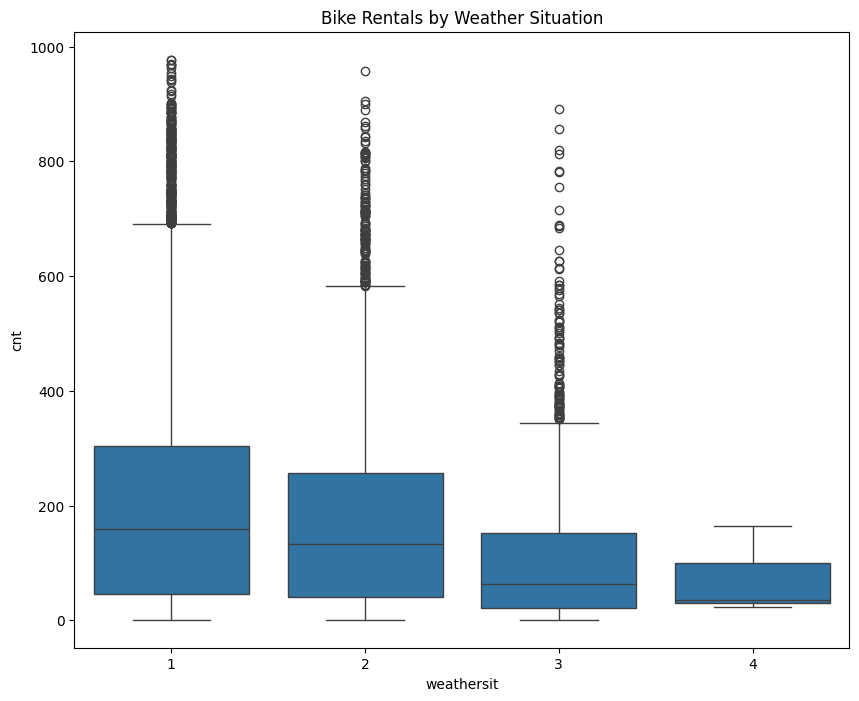

In [ ]:
# Bike rentals by weather situation
plt.figure(figsize=(10,8))
sns.boxplot(data=pd.concat([X, y], axis=1), x='weathersit', y='cnt')
plt.title('Bike Rentals by Weather Situation')

In [ ]:
# Temperature vs bike rentals
plt.figure(figsize=(10,8))
sns.scatterplot(data=pd.concat([X, y], axis=1), x='temp', y='cnt', alpha=0.5)
plt.title('Temperature vs Bike Rentals')

Text(0.5, 1.0, 'Correlation with Target Variable')

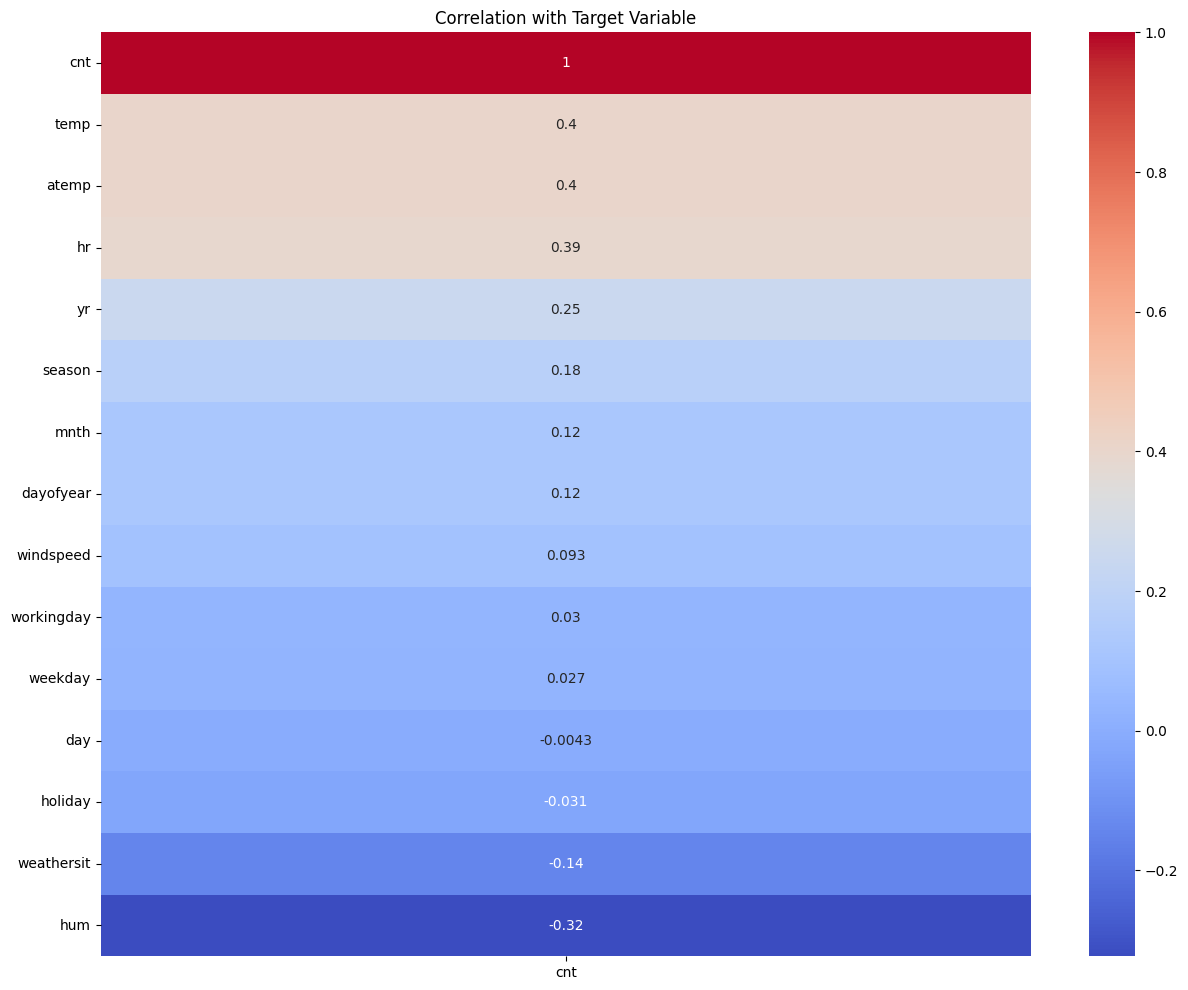

In [ ]:
# Heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix[['cnt']].sort_values(by='cnt', ascending=False), cmap='coolwarm', annot=True)
plt.title('Correlation with Target Variable')